# ЛР №2. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Используемый набор данных - U.S. Education Datasets: Unification Project https://www.kaggle.com/noriuk/us-education-datasets-unification-project.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

In [27]:
# Будем использовать только обучающую выборку
data = pd.read_csv('states_all.csv', sep=",")

In [16]:
# размер набора данных
data.shape

(1715, 25)

In [17]:
# проверим есть ли пропущенные значения
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [18]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G',
 'AVG_MATH_4_SCORE',
 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE',
 'AVG_READING_8_SCORE']

In [19]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in cols_with_na]

[('ENROLL', 0.2862973760932945),
 ('TOTAL_REVENUE', 0.2565597667638484),
 ('FEDERAL_REVENUE', 0.2565597667638484),
 ('STATE_REVENUE', 0.2565597667638484),
 ('LOCAL_REVENUE', 0.2565597667638484),
 ('TOTAL_EXPENDITURE', 0.2565597667638484),
 ('INSTRUCTION_EXPENDITURE', 0.2565597667638484),
 ('SUPPORT_SERVICES_EXPENDITURE', 0.2565597667638484),
 ('OTHER_EXPENDITURE', 0.2862973760932945),
 ('CAPITAL_OUTLAY_EXPENDITURE', 0.2565597667638484),
 ('GRADES_PK_G', 0.10087463556851312),
 ('GRADES_KG_G', 0.04839650145772595),
 ('GRADES_4_G', 0.04839650145772595),
 ('GRADES_8_G', 0.04839650145772595),
 ('GRADES_12_G', 0.04839650145772595),
 ('GRADES_1_8_G', 0.40524781341107874),
 ('GRADES_9_12_G', 0.37551020408163266),
 ('GRADES_ALL_G', 0.04839650145772595),
 ('AVG_MATH_4_SCORE', 0.6705539358600583),
 ('AVG_MATH_8_SCORE', 0.6489795918367347),
 ('AVG_READING_4_SCORE', 0.6209912536443148),
 ('AVG_READING_8_SCORE', 0.6723032069970846)]

## Обработка пропусков в данных


### Простые стратегии - удаление или заполнение нулями

В колонках AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE, AVG_READING_8_SCORE пропущенных данных слишком много и возникает опасность нарушить распределение исходных данных при заполнении пропусков, поэтому используем метод удаления колонок целиком.

In [28]:
# Колонки для которых удаляются пропуски
cols_with_na_temp = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [29]:
# Удаление пропусков
data.drop(cols_with_na_temp, axis=1, inplace=True)
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### "Внедрение значений" - импьютация (imputation)

#### Обработка пропусков в числовых данных
Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [33]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка GRADES_PK_G. Тип данных float64. Количество пустых значений 173, 10.09%.
Колонка GRADES_KG_G. Тип данных float64. Количес

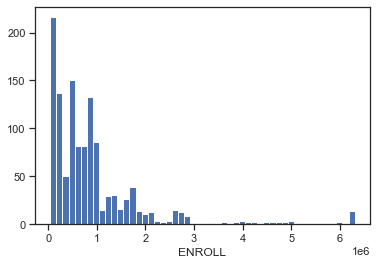

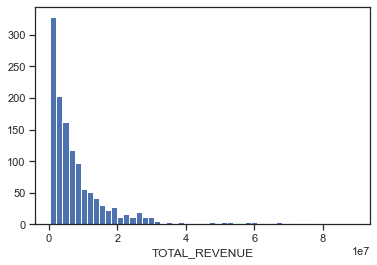

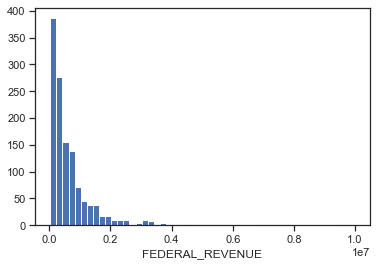

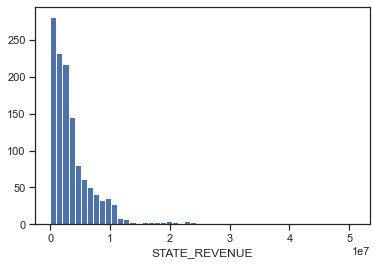

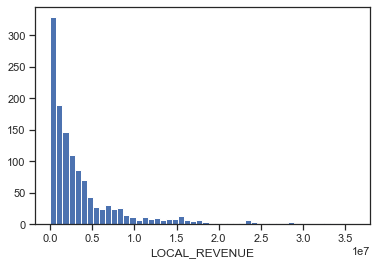

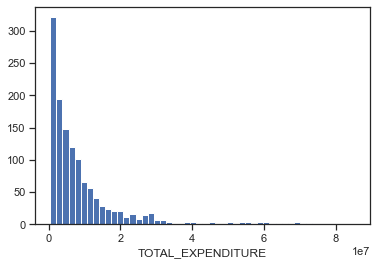

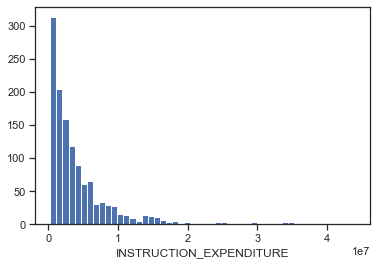

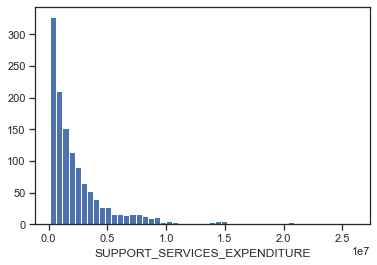

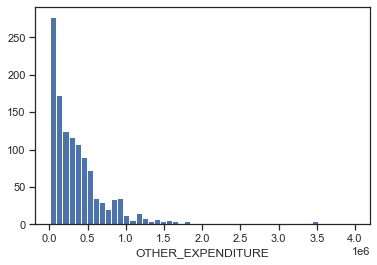

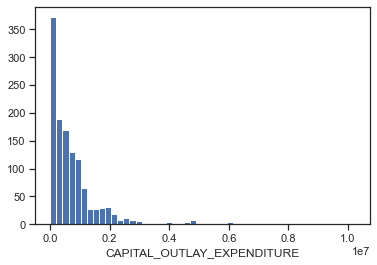

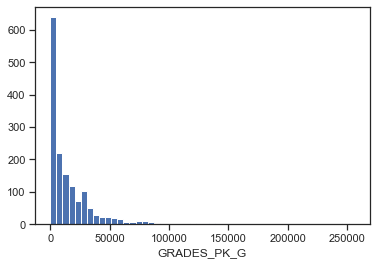

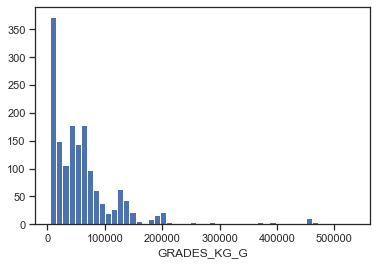

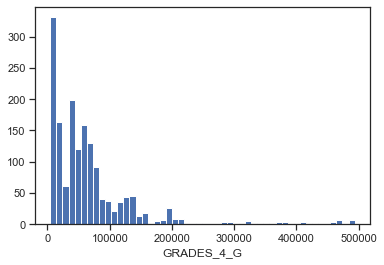

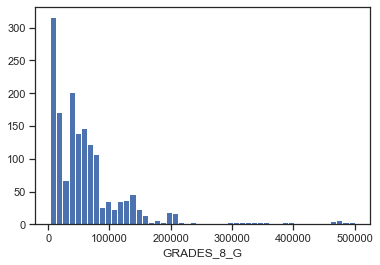

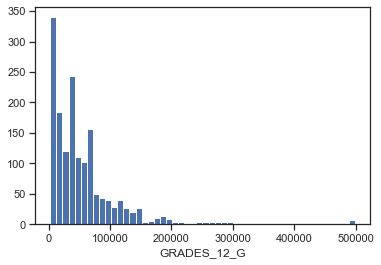

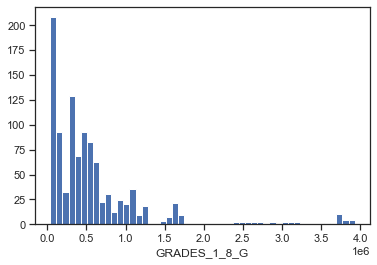

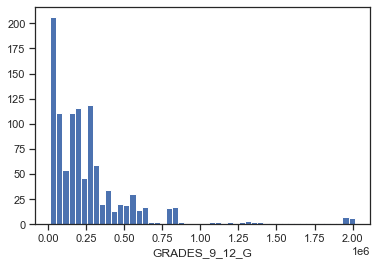

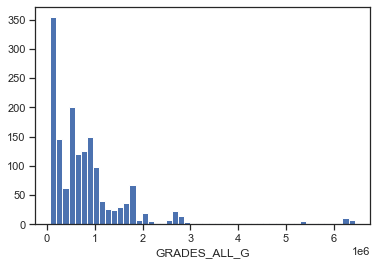

In [34]:
# Гистограмма по признакам
data_num = data[num_cols]
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
#С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения

В качестве примера возьмем количественный признак "GRADES_KG_G", поскольку процент пропусков для него составляет <5%, то будем использовать метод заполнения пропущенных значений показателями центра распределения.

In [38]:
strategies=['mean', 'median', 'most_frequent']

In [36]:
data[['GRADES_KG_G']].describe()

,GRADES_KG_G
count,1632.000000
mean,68810.962010
std,80671.033008
min,5122.000000
25%,19029.750000
50%,48122.000000
75%,78864.250000
max,535379.000000


In [37]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [40]:
test_num_impute_col(data, 'GRADES_KG_G', strategies[0])

('GRADES_KG_G', 'mean', 83, 68810.96200980392, 68810.96200980392)

In [41]:
test_num_impute_col(data, 'GRADES_KG_G', strategies[1])

('GRADES_KG_G', 'median', 83, 48122.0, 48122.0)

In [43]:
test_num_impute_col(data, 'GRADES_KG_G', strategies[2])

('GRADES_KG_G', 'most_frequent', 83, 6579.0, 6579.0)

In [44]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['GRADES_KG_G']])
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp = imp_num.fit_transform(data[['GRADES_KG_G']])
data['GRADES_KG_G'] =data_num_imp

#### Обработка пропусков в категориальных данных

In [52]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
    elif dt=='object': 
        print('Колонка {}. В колонке нет пропущенных значений.'.format(col))
        

Колонка PRIMARY_KEY. В колонке нет пропущенных значений
Колонка STATE. В колонке нет пропущенных значений


В исследуемом датасете нет колонок с категориальным признаком, в которых были бы пропущены значения. Однако класс SimpleImputer  и для категориальных признаков со стратегиями "most_frequent" или "constant". 

## Преобразование категориальных признаков в числовые

#### Кодирование категорий целочисленными значениями - label encoding

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [58]:
cat_temp_data = data[['STATE']]
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_temp_data['STATE'])

In [59]:
cat_temp_data['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

In [60]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [61]:
le.inverse_transform([0, 1, 2, 3])

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS'], dtype=object)

#### Кодирование категорий наборами бинарных значений - one-hot encoding

In [64]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_temp_data[['STATE']])


In [65]:
cat_temp_data.shape

(1715, 1)

In [66]:
cat_enc_ohe.shape

(1715, 53)

In [67]:
cat_enc_ohe

<1715x53 sparse matrix of type '<class 'numpy.float64'>'
	with 1715 stored elements in Compressed Sparse Row format>

In [68]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
    

In [69]:
cat_temp_data.head(10)

,STATE
0,ALABAMA
1,ALASKA
2,ARIZONA
3,ARKANSAS
4,CALIFORNIA
5,COLORADO
6,CONNECTICUT
7,DELAWARE
8,DISTRICT_OF_COLUMBIA
9,FLORIDA


#### Pandas get_dummies - быстрый вариант one-hot кодирования

In [70]:
pd.get_dummies(cat_temp_data).head()

,STATE_ALABAMA,STATE_ALASKA,STATE_ARIZONA,STATE_ARKANSAS,STATE_CALIFORNIA,STATE_COLORADO,STATE_CONNECTICUT,STATE_DELAWARE,STATE_DISTRICT_OF_COLUMBIA,STATE_DODEA,...,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#### MinMax масштабирование

In [73]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['GRADES_KG_G']])

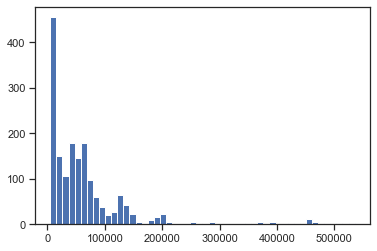

In [74]:
plt.hist(data['GRADES_KG_G'], 50)
plt.show()

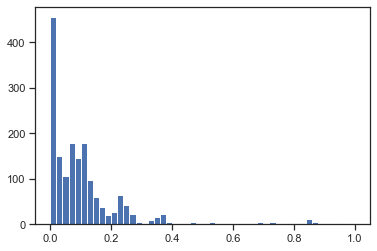

In [75]:
plt.hist(sc1_data, 50)
plt.show()

#### Масштабирование данных на основе Z-оценки - StandardScaler

In [76]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['GRADES_KG_G']])

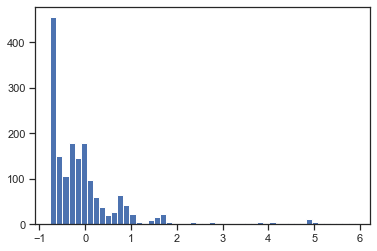

In [77]:
plt.hist(sc2_data, 50)
plt.show()